<a href="https://colab.research.google.com/github/ArbabKhan-sudo/Nust_AI_Batch-1/blob/main/meanshift_and_hierarchial_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('./clustering_data/Mall_Customers.csv')
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


22.173844534734847


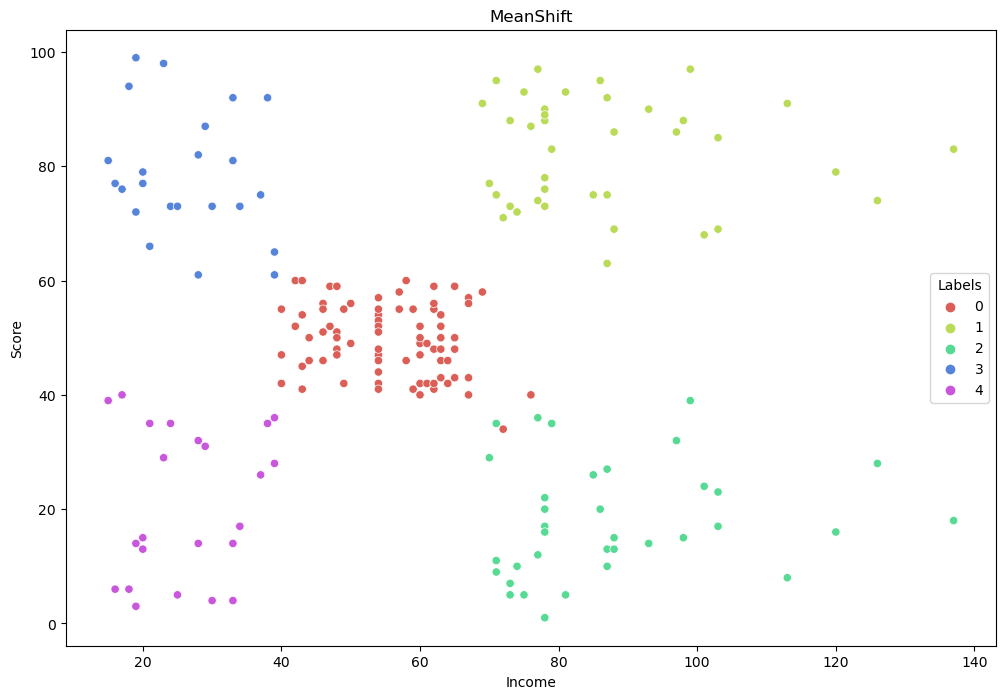

In [ ]:

from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
X = df.drop(['CustomerID', 'Gender'], axis=1)
bandwidth = estimate_bandwidth(X, quantile=0.1)
print(bandwidth)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels',
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

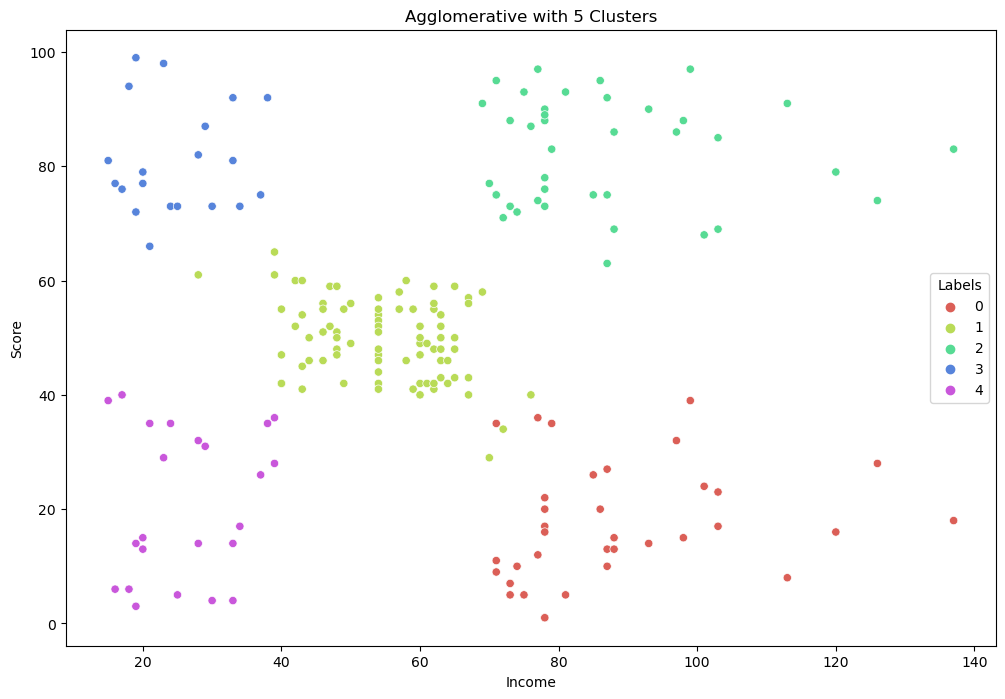

In [ ]:
#Agglomerative is bottom up, Divisive is top down.
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X, x='Income', y='Score', hue='Labels', palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()